In [255]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import arcgis
import arcgis.geoanalytics
from arcgis.gis import GIS

from arcgis.geoanalytics.manage_data import run_python_script
from arcgis.geoanalytics.analyze_patterns import forest, glr

In [256]:
gis = GIS('https://ndhagsb01.esri.com/portal', 
          'admin', 
          'esri.agp2', 
          profile="your_enterprise_portal", verify_cert=False)

In [257]:
arcgis.geoanalytics.is_supported()

True

In [258]:
bigdata_datastore_manager = arcgis.geoanalytics.get_datastores()
bigdata_datastore_manager

<DatastoreManager for https://ndhga01.esri.com:6443/arcgis/admin>

In [259]:
data_item = bigdata_datastore_manager.add_bigdata("air_quality_2017_18_19", r"\\DELDEVD014\store")

Created Big Data file share for air_quality_2017_18_19


In [6]:
bigdata_fileshares = bigdata_datastore_manager.search()
bigdata_fileshares

[<Datastore title:"/bigDataFileShares/adhoc" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/air_quality_2019" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/AzureBlob_inputs" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/AzureDataLake_inputs" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/createSpaceTimeCube" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/DataLanguages" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/findPointClusters" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ForestAndRegression" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ga-server-demo-data-bdfs" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/geoanalytics-performance-testing-data" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/geoanalytics-performance-testing-data-out" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/geocodeTe

In [7]:
file_share_folder = bigdata_fileshares[1]

In [8]:
manifest = file_share_folder.manifest
manifest

{'datasets': [{'name': 'air_quality',
   'format': {'quoteChar': '"',
    'fieldDelimiter': ',',
    'hasHeaderRow': True,
    'encoding': 'UTF-8',
    'escapeChar': '"',
    'recordTerminator': '\n',
    'type': 'delimited',
    'extension': 'csv'},
   'schema': {'fields': [{'name': 'State Code',
      'type': 'esriFieldTypeBigInteger'},
     {'name': 'County Code', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Site Num', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Parameter Code', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'POC', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Latitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'Longitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'Datum', 'type': 'esriFieldTypeString'},
     {'name': 'Parameter Name', 'type': 'esriFieldTypeString'},
     {'name': 'Date Local', 'type': 'esriFieldTypeString'},
     {'name': 'Time Local', 'type': 'esriFieldTypeString'},
     {'name': 'Date GMT', 'type': 'esriFieldTypeStr

In [4]:
search_result = gis.content.search("", item_type = "big data file share", max_items=40)
search_result

[<Item title:"bigDataFileShares_ChicagoCrime_2001_2020" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_ServiceCallsOrleans" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_ServiceCallsOrleans" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_ChicagoCrime" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_calls" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_air_quality_subset" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_chicago_crime" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_air_quality_2019" type:Big Data File Share owner:admin>]

In [6]:
air_item = search_result[-1]

In [7]:
air_item

<Item title:"bigDataFileShares_air_quality_2019" type:Big Data File Share owner:admin>

In [8]:
air_item.layers

[<Layer url:"https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality">]

In [9]:
air_lyr = air_item.layers[0]

In [16]:
description = describe_dataset(input_layer=air_lyr,
                               extent_output=True,
                               sample_size=1000,
                               output_name="Description of air quality 2019 data" + str(dt.now().microsecond),
                               return_tuple=True)

In [35]:
description = gis.content.search('Description of air quality 2019 data')[0]

In [41]:
description.layers[1]

<FeatureLayer url:"https://ndhagsb01.esri.com/gis/rest/services/Hosted/Description_of_air_quality_2019_data274232/FeatureServer/2">

In [44]:
lyr  = description.layers[1]

In [45]:
df = lyr.query(as_df=True)

In [46]:
df.to_csv()

,State_Code,County_Code,Site_Num,Parameter_Code,POC,Latitude,Longitude,Datum,Parameter_Name,Date_Local,...,Method_Type,Method_Code,Method_Name,State_Name,County_Name,Date_of_Last_Change,INSTANT_DATETIME,globalid,OBJECTID,SHAPE
0,6,19,2009,44201,1,36.634225,-120.382331,WGS84,Ozone,2018-02-24,...,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Fresno,2018-08-13,2018-02-24,{1BCC2BF0-9735-8908-772A-B50BFA99D8E3},1,"{""x"": -120.382331, ""y"": 36.634225, ""spatialRef..."
1,55,79,26,85101,3,43.060975,-87.913504,WGS84,PM10 - LC,2018-01-07,...,FEM,122,INSTRUMENT MET ONE 4 MODELS - BETA ATTENUATION,Wisconsin,Milwaukee,2018-05-07,2018-01-07,{9386030C-8A6C-C28B-0B01-A6876EEE73CE},2,"{""x"": -87.91350399999999, ""y"": 43.060975, ""spa..."
2,6,113,4,62101,2,38.534450,-121.773400,WGS84,Outdoor Temperature,2018-05-11,...,Non-FRM,59,Instrumental - Vaisala HMP 155,California,Yolo,2018-08-29,2018-05-11,{1C214561-F910-CE8F-D8EE-6EE3F6C8FD2D},3,"{""x"": -121.77340000000001, ""y"": 38.53445, ""spa..."
3,36,67,1015,64101,1,43.052350,-76.059210,WGS84,Barometric pressure,2018-12-15,...,Non-FRM,11,INSTRUMENTAL - ANEROID,New York,Onondaga,2019-02-07,2018-12-15,{B508F4A4-4FE9-287C-BCDC-1949C156EC97},4,"{""x"": -76.05921, ""y"": 43.05235, ""spatialRefere..."
4,12,95,2002,42603,1,28.596389,-81.362500,WGS84,Oxides of nitrogen (NOx),2018-12-10,...,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,Florida,Orange,2019-02-25,2018-12-10,{0CF5ABAB-7F16-391D-996F-5A664B29ABD8},5,"{""x"": -81.3625, ""y"": 28.596389, ""spatialRefere..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,113,1003,44201,1,38.661210,-121.732690,WGS84,Ozone,2018-01-08,...,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Yolo,2018-04-24,2018-01-08,{797E105E-1C67-B161-223B-DC25E2C42D8F},1001,"{""x"": -121.73268999999999, ""y"": 38.66121, ""spa..."
996,6,31,1004,42601,1,36.315670,-119.643447,NAD83,Nitric oxide (NO),2018-04-15,...,FRM,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,California,Kings,2018-10-03,2018-04-15,{EE1317CF-08D6-FE43-6D93-6AFA5701E15D},1003,"{""x"": -119.643447, ""y"": 36.31567, ""spatialRefe..."
997,26,163,93,61103,1,42.385998,-83.266189,WGS84,Wind Speed - Resultant,2018-11-03,...,Non-FRM,20,INSTRUMENTAL - VECTOR SUMMATION,Michigan,Wayne,2019-03-05,2018-11-03,{4AEC34C0-A87E-49A8-CB00-547DCF585CAD},1005,"{""x"": -83.266189, ""y"": 42.385998, ""spatialRefe..."
998,34,23,11,44201,1,40.462182,-74.429439,NAD83,Ozone,2018-01-31,...,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,New Jersey,Middlesex,2018-05-23,2018-01-31,{905D66F0-E1D6-9CB0-A73A-F0F872796992},1007,"{""x"": -74.429439, ""y"": 40.462182, ""spatialRefe..."


In [17]:
description.output_json

{'datasetName': 'air_quality',
 'datasetSource': 'Big Data File Share - air_quality_2019',
 'recordCount': 71215888,
 'geometry': {'geometryType': 'Point',
  'sref': {'wkid': 4326},
  'countNonEmpty': 71215888,
  'countEmpty': 0,
  'spatialExtent': {'xmin': -161.767,
   'ymin': 17.967309,
   'xmax': -66.05223699999999,
   'ymax': 64.84568999999999}},
 'time': {'timeType': 'Instant',
  'countNonEmpty': 71215888,
  'countEmpty': 0,
  'temporalExtent': {'start': '2018-01-01 00:00:00.000',
   'end': '2018-12-31 00:00:00.000'}}}

In [18]:
description.sample_layer

<FeatureLayer url:"https://ndhagsb01.esri.com/gis/rest/services/Hosted/Description_of_air_quality_2019_data833628/FeatureServer/2">

In [19]:
df = description.sample_layer.query().sdf

In [30]:
df.to_csv('air_data2018')

In [29]:
df.head()

,State_Code,County_Code,Site_Num,Parameter_Code,POC,Latitude,Longitude,Datum,Parameter_Name,Date_Local,...,Method_Type,Method_Code,Method_Name,State_Name,County_Name,Date_of_Last_Change,INSTANT_DATETIME,globalid,OBJECTID,SHAPE
0,4,19,1028,61104,1,32.295150,-110.982300,WGS84,Wind Direction - Resultant,2018-09-06,...,Non-FRM,61,Instrumental - Met One Sonic Anemometer Model ...,Arizona,Pima,2018-10-22,2018-09-06,{DF0DF8D7-77B0-7BDA-B7D8-B67FC41D1D5E},1,"{""x"": -110.98230000000001, ""y"": 32.29515, ""spa..."
1,56,25,100,42602,1,42.822310,-106.365010,WGS84,Nitrogen dioxide (NO2),2018-10-03,...,FRM,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Wyoming,Natrona,2019-02-27,2018-10-03,{329474E0-F18F-45B2-5FCF-FC0CF801A566},2,"{""x"": -106.36501, ""y"": 42.822309999999995, ""sp..."
2,6,85,6,42603,1,37.338135,-121.849783,WGS84,Oxides of nitrogen (NOx),2018-07-23,...,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Santa Clara,2018-12-12,2018-07-23,{FA052A94-6F63-AEF0-E544-92D12C175A2C},3,"{""x"": -121.849783, ""y"": 37.338135, ""spatialRef..."
3,6,83,1013,62101,1,34.725352,-120.428717,NAD83,Outdoor Temperature,2018-10-26,...,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,California,Santa Barbara,2019-02-26,2018-10-26,{2BE39662-E32A-7D58-33FA-809FE51A901A},4,"{""x"": -120.428717, ""y"": 34.725352, ""spatialRef..."
4,22,121,1,42401,1,30.500642,-91.213556,NAD83,Sulfur dioxide,2018-04-12,...,FEM,60,INSTRUMENTAL - PULSED FLUORESCENT,Louisiana,West Baton Rouge,2018-05-14,2018-04-12,{02A82E0F-819E-1CAE-B184-CCB29CB7D2BA},5,"{""x"": -91.213556, ""y"": 30.500642, ""spatialRefe..."


In [21]:
df.columns

Index(['State_Code', 'County_Code', 'Site_Num', 'Parameter_Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter_Name', 'Date_Local',
       'Time_Local', 'Date_GMT', 'Time_GMT', 'Sample_Measurement',
       'Units_of_Measure', 'MDL', 'Uncertainty', 'Qualifier', 'Method_Type',
       'Method_Code', 'Method_Name', 'State_Name', 'County_Name',
       'Date_of_Last_Change', 'INSTANT_DATETIME', 'globalid', 'OBJECTID',
       'SHAPE'],
      dtype='object')

Field Position	Field Name	Description
1

State Code

The FIPS code of the state in which the monitor resides.

2

County Code

The FIPS code of the county in which the monitor resides.

3

Site Num

A unique number within the county identifying the site.

4

Parameter Code

The AQS code corresponding to the parameter measured by the monitor.

5

POC

This is the “Parameter Occurrence Code” used to distinguish different instruments that measure the same parameter at the same site.

6

Latitude

The monitoring site’s angular distance north of the equator measured in decimal degrees.

7

Longitude

The monitoring site’s angular distance east of the prime meridian measured in decimal degrees.

8

Datum

The Datum associated with the Latitude and Longitude measures.

9

Parameter Name

The name or description assigned in AQS to the parameter measured by the monitor. Parameters may be pollutants or non-pollutants.

10

Date Local

The calendar date of the sample in Local Standard Time at the monitor.

11

Time Local

The time of day that sampling began on a 24-hour clock in Local Standard Time.

12

Date GMT

The calendar date of the sample in Greenwich Mean Time.

13

Time GMT

The time of day that sampling began on a 24-hour clock in Greenwich Mean Time.

14

Sample Measurement

The measured value in the standard units of measure for the parameter.

15

Units of Measure

The unit of measure for the parameter. QAD always returns data in the standard units for the parameter. Submitters are allowed to report data in any unit and EPA converts to a standard unit so that we may use the data in calculations.

16

MDL

The Method Detection Limit. The minimum sample concentration detectable for the monitor and method. Note: if samples are reported below this level, they may have been replaced by 1/2 the MDL.

17

Uncertainty

The total measurement uncertainty associated with a reported measurement as indicated by the reporting agency.

18

Qualifier

Sample values may have qualifiers that indicate why they are missing or that they are out of the ordinary. Types of qualifiers are: null data, exceptional event, natural events, and quality assurance. The highest ranking qualifier, if any, is described in this field.

19

Method Type

An indication of whether the method used to collect the data is a federal reference method (FRM), equivalent to a federal reference method, an approved regional method, or none of the above (non-federal reference method).

20

Method Code

An internal system code indicating the method (processes, equipment, and protocols) used in gathering and measuring the sample. The method name is in the next column.

21

Method Name

A short description of the processes, equipment, and protocols used in gathering and measuring the sample.

22

State Name

The name of the state where the monitoring site is located.

23

County Name

The name of the county where the monitoring site is located.

24

Date of Last Change

The date the last time any numeric values in this record were updated in the AQS data system.



In [21]:
m1 = gis.map('chicago')
m1

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
m1.add_layer(description.sample_layer)

In [23]:
m1.zoom_to_layer(description.sample_layer)

In [40]:
def data_processsing():
    from datetime import datetime as dt
    import pyspark.sql.functions as F
    from pyspark.sql.functions import concat, col, lit
    # Load the big data file share layer into a DataFrame.
    df = layers[0]
    cols = ['Site Num', 'County Code', 'State Code', 'Date Local', 'Time Local', 'Parameter Name', 'Sample Measurement']
    df = df.select(cols)
    df = df.withColumn('Site_Num', F.lpad(df['Site Num'], 4, '0'))
    df = df.withColumn('County_Code', F.lpad(df['County Code'], 3, '0'))
    df = df.withColumn('State_Code', F.lpad(df['State Code'], 2, '0'))
    df = df.withColumn('unique_id', F.concat(F.col('State_Code'), F.col('County_Code'), F.col('Site_Num')))
#     drop_cols = ['Site_Num', 'County_Code', 'State_Code', 'Site Num', 'County Code', 'State Code']
    df = df.drop('Site_Num', 'County_Code', 'State_Code', 'Site Num', 'County Code', 'State Code')
    df = df.withColumn('datetime', concat(col("Date Local"), lit(" "), col("Time Local")))
#     drop_cols = ['Time Local', 'Date Local']
    df = df.drop('Time Local', 'Date Local')
    df = df.where(col("unique_id") == 300710010)
    # group the dataframe by TextType field and count the number of calls for each call type. 
    df = df.groupby(df['datetime'], df['unique_id']).pivot("Parameter Name").avg("Sample Measurement")

    df.write.format("webgis").save("timeseries_data" + str(dt.now().microsecond))

In [41]:
run_python_script(code=data_processsing, layers=[air_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def data_processsing():\\n    from datetime import datetime as dt\\n    import pyspark.sql.functions as F\\n    from pyspark.sql.functions import concat, col, lit\\n    # Load the big data file share layer into a DataFrame.\\n    df = layers[0]\\n    cols = [\'Site Num\', \'County Code\', \'State Code\', \'Date Local\', \'Time Local\', \'Parameter Name\', \'Sample Measurement\']\\n    df = df.select(cols)\\n    df = df.withColumn(\'Site_Num\', F.lpad(df[\'Site Num\'], 4, \'0\'))\\n    df = df.withColumn(\'County_Code\', F.lpad(df[\'County Code\'], 3, \'0\'))\\n    df = df.withColumn(\'State_Code\', F.lpad(df[\'State Code\'], 2, \'0\'))\\n    df = df.withColumn(\'unique_id\', F.concat(F.col(\'State_Code\'), F.col(\'County_Code\'), F.col(\'Site_Num\')))\\n#     drop_cols = [\'Site_Num\', \'County_Code\', \'State_Code\', \'Site Num\', \'County Code\', \'State Code\']\\n    df = df.dr

In [3]:
data = gis.content.search('timeseries_data')[0]

In [4]:
data

<Item title:"timeseries_data416228" type:Table Layer owner:admin>

In [5]:
series_data = data.tables[0]

In [9]:
df = data.tables[0].query(as_df=True)

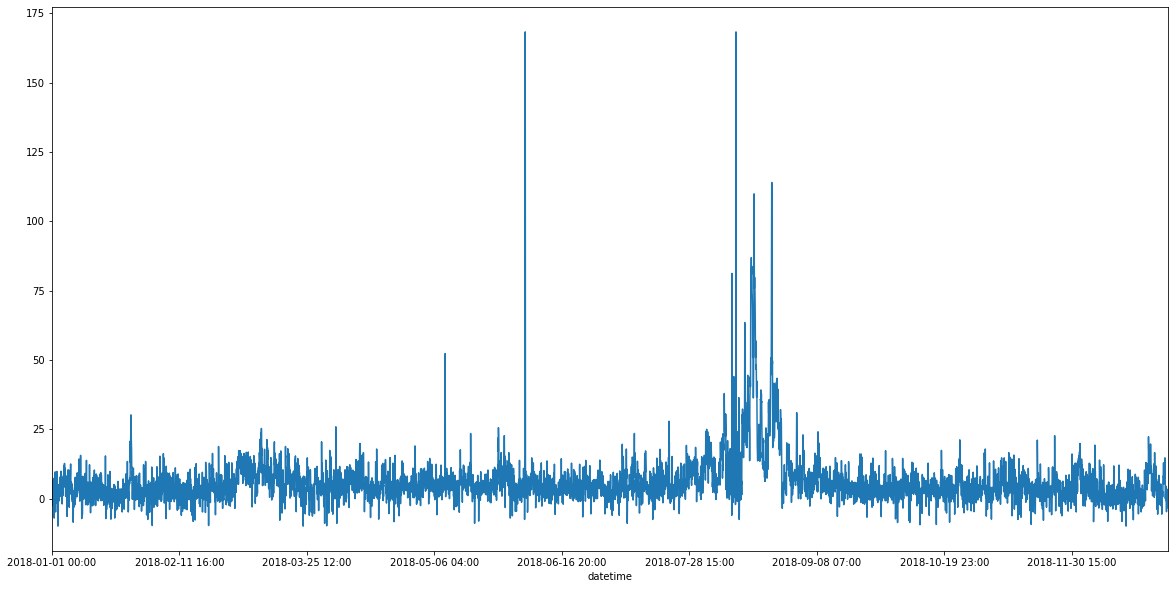

In [92]:
plt.figure(figsize=(20,10))
series.plot()
plt.show()

In [94]:
def pm_data():
    from datetime import datetime as dt
     
    df = layers[0]
    cols = ['PM2_5___Local_Conditions', 'datetime']
    df = df.select(cols)
    df = df.drop('globalid', 'OBJECTID')
    df.write.format("webgis").save("pm2_5_data" + str(dt.now().microsecond))    

In [95]:
run_python_script(code=pm_data, layers=[series_data])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def pm_data():\\n    from datetime import datetime as dt\\n    from pyspark.sql.functions import monotonically_increasing_id \\n    df = layers[0]\\n    cols = [\'PM2_5___Local_Conditions\', \'datetime\']\\n    df = df.select(cols)\\n    df = df.drop(\'globalid\', \'OBJECTID\')\\n    df.write.format("webgis").save("pm2_5_data" + str(dt.now().microsecond))    \\n\\npm_data()" https://ndhagsb01.esri.com/gis/rest/services/Hosted/timeseries_data416228/FeatureServer/0 "{"defaultAggregationStyles": false}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Mon Mar  9 12:48:04 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhagsb01.esri.com/gis/rest/services/Hosted/timeseries_data416228/FeatureServer/0'},
 {'type': 'esriJobMessageTypeInformative',
  'description': '{"messageCode":"BD_101028","messa

In [5]:
data = gis.content.search('pm2_5_data')[0]

In [6]:
data

<Item title:"pm2_5_data288259" type:Table Layer owner:admin>

In [7]:
pm_data = data.tables[0]

In [75]:
df = pm_data.query(as_df=True)

In [76]:
df

,OBJECTID,PM2_5___Local_Conditions,datetime,globalid
0,1,6.0,2018-04-01 06:00,{69DFA2BA-50BD-6065-2601-5197D4053E71}
1,2,7.7,2018-12-21 16:00,{9F45D805-4FC3-4A7E-D468-C5B0E4C0CBFE}
2,3,9.4,2018-07-30 22:00,{436E5305-BBCE-CB66-1FC5-E3A4F5A9ED4E}
3,4,4.2,2018-06-26 22:00,{FCD168C6-8B1C-D7BA-9B24-57D78EE85748}
4,5,6.1,2018-05-20 03:00,{9F3338BA-4279-E471-FFA7-4B9FC24DA09A}
...,...,...,...,...
8748,8910,-3.8,2018-12-28 09:00,{F71CEF9A-956F-2E23-D807-FA1874B5AF13}
8749,8916,1.6,2018-06-18 16:00,{D33AD21C-1E15-2485-4EA9-19B188D0826A}
8750,8922,-1.1,2018-09-21 06:00,{C69AE6AF-29A7-A481-44E5-32DF96011C51}
8751,8928,11.7,2018-12-26 13:00,{46DDA1CA-B717-4D8F-3B5C-328F0DF120E0}


In [77]:
df.set_index('datetime', inplace=True)

In [78]:
df.PM2_5___Local_Conditions.values

array([ 6. ,  7.7,  9.4,  4.2, ...,  1.6, -1.1, 11.7,  nan])

In [80]:
series = df.PM2_5___Local_Conditions

In [81]:
series.fillna(method='pad', inplace=True)

In [82]:
series.sort_index(inplace=True)

In [83]:
series

datetime
2018-01-01 00:00    6.6
2018-01-01 01:00    5.6
2018-01-01 02:00    0.1
2018-01-01 03:00   -2.4
2018-01-01 04:00   -2.2
                   ... 
2018-12-31 19:00    2.0
2018-12-31 20:00    0.5
2018-12-31 21:00    2.8
2018-12-31 22:00   -3.3
2018-12-31 23:00    0.0
Name: PM2_5___Local_Conditions, Length: 8753, dtype: float64

In [84]:
newdf = pd.DataFrame(series)

In [ ]:
df1['A'] = df1['A'].apply(lambda x: [y if y <= 9 else 11 for y in x])

In [103]:
Null

NameError: name 'Null' is not defined

In [104]:
import numpy as np

In [105]:
np.nan

nan

In [127]:
pd.Series(newdf['PM2_5___Local_Conditions'].iteritems()).apply(lambda x: print(x[0]))

2018-01-01 00:00
2018-01-01 01:00
2018-01-01 02:00
2018-01-01 03:00
2018-01-01 04:00
2018-01-01 05:00
2018-01-01 06:00
2018-01-01 07:00
2018-01-01 08:00
2018-01-01 09:00
2018-01-01 10:00
2018-01-01 11:00
2018-01-01 12:00
2018-01-01 13:00
2018-01-01 14:00
2018-01-01 15:00
2018-01-01 16:00
2018-01-01 17:00
2018-01-01 18:00
2018-01-01 19:00
2018-01-01 20:00
2018-01-01 21:00
2018-01-01 22:00
2018-01-01 23:00
2018-01-02 00:00
2018-01-02 01:00
2018-01-02 02:00
2018-01-02 03:00
2018-01-02 04:00
2018-01-02 05:00
2018-01-02 06:00
2018-01-02 07:00
2018-01-02 08:00
2018-01-02 09:00
2018-01-02 10:00
2018-01-02 11:00
2018-01-02 12:00
2018-01-02 13:00
2018-01-02 14:00
2018-01-02 15:00
2018-01-02 16:00
2018-01-02 17:00
2018-01-02 18:00
2018-01-02 19:00
2018-01-02 20:00
2018-01-02 21:00
2018-01-02 22:00
2018-01-02 23:00
2018-01-03 00:00
2018-01-03 01:00
2018-01-03 02:00
2018-01-03 03:00
2018-01-03 04:00
2018-01-03 05:00
2018-01-03 06:00
2018-01-03 07:00
2018-01-03 08:00
2018-01-03 09:00
2018-01-03 10:

2018-02-10 02:00
2018-02-10 03:00
2018-02-10 04:00
2018-02-10 05:00
2018-02-10 06:00
2018-02-10 07:00
2018-02-10 08:00
2018-02-10 09:00
2018-02-10 10:00
2018-02-10 11:00
2018-02-10 12:00
2018-02-10 13:00
2018-02-10 14:00
2018-02-10 15:00
2018-02-10 16:00
2018-02-10 17:00
2018-02-10 18:00
2018-02-10 19:00
2018-02-10 20:00
2018-02-10 21:00
2018-02-10 22:00
2018-02-10 23:00
2018-02-11 00:00
2018-02-11 01:00
2018-02-11 02:00
2018-02-11 03:00
2018-02-11 04:00
2018-02-11 05:00
2018-02-11 06:00
2018-02-11 07:00
2018-02-11 08:00
2018-02-11 09:00
2018-02-11 10:00
2018-02-11 11:00
2018-02-11 12:00
2018-02-11 13:00
2018-02-11 14:00
2018-02-11 15:00
2018-02-11 16:00
2018-02-11 17:00
2018-02-11 18:00
2018-02-11 19:00
2018-02-11 20:00
2018-02-11 21:00
2018-02-11 22:00
2018-02-11 23:00
2018-02-12 00:00
2018-02-12 01:00
2018-02-12 02:00
2018-02-12 03:00
2018-02-12 04:00
2018-02-12 05:00
2018-02-12 06:00
2018-02-12 07:00
2018-02-12 08:00
2018-02-12 09:00
2018-02-12 14:00
2018-02-12 15:00
2018-02-12 16:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2018-03-25 03:00
2018-03-25 04:00
2018-03-25 05:00
2018-03-25 06:00
2018-03-25 07:00
2018-03-25 08:00
2018-03-25 09:00
2018-03-25 10:00
2018-03-25 11:00
2018-03-25 12:00
2018-03-25 13:00
2018-03-25 14:00
2018-03-25 15:00
2018-03-25 16:00
2018-03-25 17:00
2018-03-25 18:00
2018-03-25 19:00
2018-03-25 20:00
2018-03-25 21:00
2018-03-25 22:00
2018-03-25 23:00
2018-03-26 00:00
2018-03-26 01:00
2018-03-26 02:00
2018-03-26 03:00
2018-03-26 04:00
2018-03-26 05:00
2018-03-26 06:00
2018-03-26 07:00
2018-03-26 08:00
2018-03-26 09:00
2018-03-26 10:00
2018-03-26 11:00
2018-03-26 12:00
2018-03-26 13:00
2018-03-26 14:00
2018-03-26 15:00
2018-03-26 16:00
2018-03-26 17:00
2018-03-26 18:00
2018-03-26 19:00
2018-03-26 20:00
2018-03-26 21:00
2018-03-26 22:00
2018-03-26 23:00
2018-03-27 00:00
2018-03-27 01:00
2018-03-27 02:00
2018-03-27 03:00
2018-03-27 04:00
2018-03-27 05:00
2018-03-27 06:00
2018-03-27 07:00
2018-03-27 08:00
2018-03-27 09:00
2018-03-27 10:00
2018-03-27 11:00
2018-03-27 12:00
2018-03-27 13:

2018-05-04 05:00
2018-05-04 06:00
2018-05-04 07:00
2018-05-04 08:00
2018-05-04 09:00
2018-05-04 10:00
2018-05-04 11:00
2018-05-04 12:00
2018-05-04 13:00
2018-05-04 14:00
2018-05-04 15:00
2018-05-04 16:00
2018-05-04 17:00
2018-05-04 18:00
2018-05-04 19:00
2018-05-04 20:00
2018-05-04 21:00
2018-05-04 22:00
2018-05-04 23:00
2018-05-05 00:00
2018-05-05 01:00
2018-05-05 02:00
2018-05-05 03:00
2018-05-05 04:00
2018-05-05 05:00
2018-05-05 06:00
2018-05-05 07:00
2018-05-05 08:00
2018-05-05 09:00
2018-05-05 10:00
2018-05-05 11:00
2018-05-05 12:00
2018-05-05 13:00
2018-05-05 14:00
2018-05-05 15:00
2018-05-05 16:00
2018-05-05 17:00
2018-05-05 18:00
2018-05-05 19:00
2018-05-05 20:00
2018-05-05 21:00
2018-05-05 22:00
2018-05-05 23:00
2018-05-06 00:00
2018-05-06 01:00
2018-05-06 02:00
2018-05-06 03:00
2018-05-06 04:00
2018-05-06 05:00
2018-05-06 06:00
2018-05-06 07:00
2018-05-06 08:00
2018-05-06 09:00
2018-05-06 10:00
2018-05-06 11:00
2018-05-06 12:00
2018-05-06 13:00
2018-05-06 14:00
2018-05-06 15:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




2018-07-01 08:00
2018-07-01 09:00
2018-07-01 10:00
2018-07-01 11:00
2018-07-01 12:00
2018-07-01 13:00
2018-07-01 14:00
2018-07-01 15:00
2018-07-01 16:00
2018-07-01 17:00
2018-07-01 18:00
2018-07-01 19:00
2018-07-01 20:00
2018-07-01 21:00
2018-07-01 22:00
2018-07-01 23:00
2018-07-02 00:00
2018-07-02 01:00
2018-07-02 02:00
2018-07-02 03:00
2018-07-02 04:00
2018-07-02 05:00
2018-07-02 06:00
2018-07-02 07:00
2018-07-02 08:00


KeyboardInterrupt: 

In [133]:
new_S=pd.Series()
for i,item in enumerate(newdf['PM2_5___Local_Conditions']):
    if item<=0:
        newdf['PM2_5___Local_Conditions'].iloc[i]=newdf['PM2_5___Local_Conditions'].iloc[i-1]
    else:
        newdf['PM2_5___Local_Conditions'].iloc[i]=item

In [134]:
newdf['PM2_5___Local_Conditions']

datetime
2018-01-01 00:00    6.6
2018-01-01 01:00    5.6
2018-01-01 02:00    0.1
2018-01-01 03:00    0.1
2018-01-01 04:00    0.1
                   ... 
2018-12-31 19:00    2.0
2018-12-31 20:00    0.5
2018-12-31 21:00    2.8
2018-12-31 22:00    2.8
2018-12-31 23:00    2.8
Name: PM2_5___Local_Conditions, Length: 8753, dtype: float64

pd.Series(newdf['PM2_5___Local_Conditions'].iteritems()).apply(lambda x: newdf['PM2_5___Local_Conditions'].iloc[x[0]-1] if x[1]<=0)

In [135]:
train = newdf.iloc[:7000]
test = newdf.iloc[7000:]

In [136]:
test

,PM2_5___Local_Conditions
datetime,
2018-10-19 23:00,4.1
2018-10-20 00:00,5.1
2018-10-20 01:00,8.0
2018-10-20 02:00,4.2
2018-10-20 03:00,2.7
...,...
2018-12-31 19:00,2.0
2018-12-31 20:00,0.5
2018-12-31 21:00,2.8


In [137]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from arcgis.gis import GIS
from arcgis.features import SpatialDataFrame
from arcgis.features.analysis import interpolate_points

In [138]:
scaler = MinMaxScaler()

In [139]:
tr_scaled = scaler.fit_transform(train)
ts_scaled = scaler.fit_transform(test)

In [140]:
tr_scaled

array([[0.038644],
       [0.032699],
       [0.      ],
       [0.      ],
       ...,
       [0.021998],
       [0.023187],
       [0.023187],
       [0.039239]])

In [141]:
tr_scaled_df = pd.DataFrame(tr_scaled, index = train.index, columns=[train.columns[0]])
ts_scaled_df = pd.DataFrame(ts_scaled, index = test.index, columns=[test.columns[0]])

In [142]:
def timeseries_feature_builder(df, lag):
    df_copy = df.copy()
    for i in range(1,lag):
        df_copy['lag'+str(i)] = df.shift(i) 
    return df_copy
    df_copy = df.copy()

In [143]:
timeseries_train_df = timeseries_feature_builder(tr_scaled_df, 24)

In [144]:
timeseries_test_df = timeseries_feature_builder(ts_scaled_df, 24)

In [145]:
timeseries_train_df

,PM2_5___Local_Conditions,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00,0.038644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00,0.032699,0.038644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00,0.000000,0.032699,0.038644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00,0.000000,0.000000,0.032699,0.038644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 04:00,0.000000,0.000000,0.000000,0.032699,0.038644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-19 18:00,0.000595,0.028537,0.036861,0.036861,0.002973,0.018430,0.004756,0.025565,0.036266,0.061237,0.059453,0.017241,0.042212,0.005945,0.045779,0.057669,0.055291,0.081451,0.102854,0.028537,0.061831,0.051130,0.041617,0.055886
2018-10-19 19:00,0.021998,0.000595,0.028537,0.036861,0.036861,0.002973,0.018430,0.004756,0.025565,0.036266,0.061237,0.059453,0.017241,0.042212,0.005945,0.045779,0.057669,0.055291,0.081451,0.102854,0.028537,0.061831,0.051130,0.041617
2018-10-19 20:00,0.023187,0.021998,0.000595,0.028537,0.036861,0.036861,0.002973,0.018430,0.004756,0.025565,0.036266,0.061237,0.059453,0.017241,0.042212,0.005945,0.045779,0.057669,0.055291,0.081451,0.102854,0.028537,0.061831,0.051130


In [150]:
def make_arrays(tr,ts):
    x_train_array = tr.dropna().drop(tr.columns[0], axis=1).values
    y_train_array = tr.dropna()[tr.columns[0]].values
    x_test_array = ts.dropna().drop(ts.columns[0], axis=1).values
    y_test_array = ts.dropna()[ts.columns[0]].values    
    return x_train_array, y_train_array, x_test_array, y_test_array

In [153]:
x_train_array, y_train_array, x_test_array, y_test_array = make_arrays(timeseries_train_df, timeseries_test_df)

In [154]:
x_train_array

array([[0.011891, 0.016052, 0.010702, 0.010702, ..., 0.      , 0.      , 0.032699, 0.038644],
       [0.007134, 0.011891, 0.016052, 0.010702, ..., 0.      , 0.      , 0.      , 0.032699],
       [0.004162, 0.007134, 0.011891, 0.016052, ..., 0.000595, 0.      , 0.      , 0.      ],
       [0.004162, 0.004162, 0.007134, 0.011891, ..., 0.016052, 0.000595, 0.      , 0.      ],
       ...,
       [0.000595, 0.028537, 0.036861, 0.036861, ..., 0.028537, 0.061831, 0.05113 , 0.041617],
       [0.021998, 0.000595, 0.028537, 0.036861, ..., 0.102854, 0.028537, 0.061831, 0.05113 ],
       [0.023187, 0.021998, 0.000595, 0.028537, ..., 0.081451, 0.102854, 0.028537, 0.061831],
       [0.023187, 0.023187, 0.021998, 0.000595, ..., 0.055291, 0.081451, 0.102854, 0.028537]])

In [155]:
y_train_array

array([0.007134, 0.004162, 0.004162, 0.05648 , ..., 0.021998, 0.023187, 0.023187, 0.039239])

In [158]:
x_train_array.shape[1]

23

In [161]:
trainX = np.reshape(x_train_array, (x_train_array.shape[0],1,x_train_array.shape[1]))
testX = np.reshape(x_test_array, (x_test_array.shape[0],1,x_test_array.shape[1]))      

In [162]:
model = Sequential()
model.add(LSTM(10,
               return_sequences=True, 
               input_shape=(trainX.shape[1],
                            trainX.shape[2]),
               kernel_initializer='lecun_uniform'))

In [164]:
model.add(Dropout(0.2))    
model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.2))    
model.add(LSTM(10))
model.add(Dropout(0.2))
model.add(Dense(1))        
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [166]:
model.fit(trainX, 
          y_train_array, 
          batch_size=120, 
          epochs=100, 
          validation_data=(testX, y_test_array), 
          verbose=1)

Train on 6977 samples, validate on 1730 samples
Epoch 1/100
6977/6977 [==============================] - ETA: 1s - loss: 5.1648e-0 - ETA: 0s - loss: 8.9225e-0 - ETA: 0s - loss: 7.9241e-0 - ETA: 0s - loss: 7.1145e-0 - ETA: 0s - loss: 6.7837e-0 - ETA: 0s - loss: 9.5815e-0 - ETA: 0s - loss: 9.0403e-0 - ETA: 0s - loss: 8.9268e-0 - ETA: 0s - loss: 8.4205e-0 - ETA: 0s - loss: 8.1887e-0 - ETA: 0s - loss: 9.4963e-0 - ETA: 0s - loss: 9.3878e-0 - 1s 106us/sample - loss: 9.3283e-04 - val_loss: 0.0177
Epoch 2/100
6977/6977 [==============================] - ETA: 0s - loss: 4.1038e-0 - ETA: 0s - loss: 7.0739e-0 - ETA: 0s - loss: 6.4125e-0 - ETA: 0s - loss: 6.3120e-0 - ETA: 0s - loss: 6.9570e-0 - ETA: 0s - loss: 6.8747e-0 - ETA: 0s - loss: 8.9006e-0 - ETA: 0s - loss: 0.0011    - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 9.7262e-0 - ETA: 0s - loss: 9.2139e-0 - ETA: 0s - loss: 9.2410e-0 - 1s 105us/sample - loss: 9.3574e-04 - val_loss: 0.0178
Epoch 3/100
6977/6977 [==============================] - ETA: 

6977/6977 [==============================] - ETA: 0s - loss: 7.8164e-0 - ETA: 0s - loss: 9.0362e-0 - ETA: 0s - loss: 0.0015    - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 9.6634e-0 - ETA: 0s - loss: 9.1180e-0 - ETA: 0s - loss: 8.8643e-0 - ETA: 0s - loss: 8.5632e-0 - ETA: 0s - loss: 9.7272e-0 - ETA: 0s - loss: 9.3420e-0 - 1s 102us/sample - loss: 9.1756e-04 - val_loss: 0.0185
Epoch 38/100
6977/6977 [==============================] - ETA: 0s - loss: 4.2871e-0 - ETA: 0s - loss: 5.5184e-0 - ETA: 0s - loss: 0.0012    - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 9.8070e-0 - ETA: 0s - loss: 9.6021e-0 - ETA: 0s - loss: 9.0580e-0 - ETA: 0s - loss: 8.7804e-0 - ETA: 0s - loss: 8.9179e-0 - 1s 104us/sample - loss: 8.7501e-04 - val_loss: 0.0182
Epoch 39/100
6977/6977 [==============================] - ETA: 0s - loss: 5.6644e-0 - ETA: 0s - loss: 6.4814e-0 - ETA: 0s - loss: 5.9290e-0 - ETA

6977/6977 [==============================] - ETA: 0s - loss: 5.7496e-0 - ETA: 0s - loss: 0.0019    - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 9.6302e-0 - ETA: 0s - loss: 0.0011    - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 9.8455e-0 - 1s 105us/sample - loss: 9.6563e-04 - val_loss: 0.0184
Epoch 74/100
6977/6977 [==============================] - ETA: 0s - loss: 6.2160e-0 - ETA: 0s - loss: 5.6514e-0 - ETA: 0s - loss: 7.1385e-0 - ETA: 0s - loss: 6.5503e-0 - ETA: 0s - loss: 8.3555e-0 - ETA: 0s - loss: 0.0011    - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 9.6714e-0 - ETA: 0s - loss: 9.2823e-0 - 1s 103us/sample - loss: 9.3640e-04 - val_loss: 0.0183
Epoch 75/100
6977/6977 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.001 - ETA: 0s

In [171]:
testPredict = model.predict(testX)

In [172]:
rSquare_test = r2_score(y_test_array, testPredict)

In [173]:
print('Test R-squared is: %f'%rSquare_test) 

Test R-squared is: 0.275098


In [174]:
testPredict = scaler.inverse_transform(testPredict)    

In [179]:
len(testPredict)

1730

In [194]:
test

,PM2_5___Local_Conditions
datetime,
2018-10-19 23:00,4.1
2018-10-20 00:00,5.1
2018-10-20 01:00,8.0
2018-10-20 02:00,4.2
2018-10-20 03:00,2.7
...,...
2018-12-31 19:00,2.0
2018-12-31 20:00,0.5
2018-12-31 21:00,2.8


In [206]:
res = test.copy()

In [207]:
res

,PM2_5___Local_Conditions
datetime,
2018-10-19 23:00,4.1
2018-10-20 00:00,5.1
2018-10-20 01:00,8.0
2018-10-20 02:00,4.2
2018-10-20 03:00,2.7
...,...
2018-12-31 19:00,2.0
2018-12-31 20:00,0.5
2018-12-31 21:00,2.8


In [208]:
res = res.iloc[23:].copy()

In [209]:
res['pred'] = testPredict

In [210]:
res

,PM2_5___Local_Conditions,pred
datetime,,
2018-10-20 22:00,4.8,7.673317
2018-10-20 23:00,5.3,5.095949
2018-10-21 00:00,4.0,5.517740
2018-10-21 01:00,7.1,3.910388
2018-10-21 02:00,3.9,7.030327
...,...,...
2018-12-31 19:00,2.0,2.415951
2018-12-31 20:00,0.5,1.905040
2018-12-31 21:00,2.8,0.972972


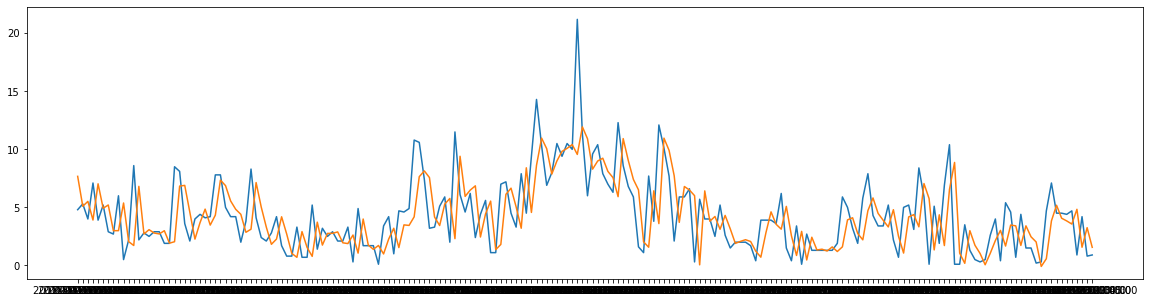

In [212]:
plt.figure(figsize=(20,5))
plt.plot(res[:200])        


In [248]:
x_test24 = testX[-1]

In [249]:
x_test24.shape

(1, 23)

In [251]:
x_test_array.shape[0]

1730

In [252]:
x_test24 = np.reshape(x_test24, (x_test24.shape[0],1,x_test24.shape[1]))

In [253]:
next_predict = model.predict(x_test24)
next_predict = scaler.inverse_transform(next_predict)

In [254]:
next_predict

array([[2.888326]], dtype=float32)